In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dummy Data

df = pd.read_csv('/content/drive/MyDrive/Capital/data.txt', sep=",")
df.head()

,User,Movie,Rating
0,Alice,Star Wars,5
1,Frank,The Godfather,4
2,Bob,Titanic,5
3,Carol,The Matrix,3
4,Dave,Inception,2


In [4]:
# Check overall data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    58 non-null     object
 1   Movie   58 non-null     object
 2   Rating  55 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [5]:
# Convert Rating Column to Numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


In [6]:
# Handle Ratings missing values on Movie Rating using Simple Imputer and mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Rating'] = imputer.fit_transform(df['Rating'].values.reshape(-1, 1))


In [7]:
# Check if missing values still exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   User    58 non-null     object 
 1   Movie   58 non-null     object 
 2   Rating  58 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


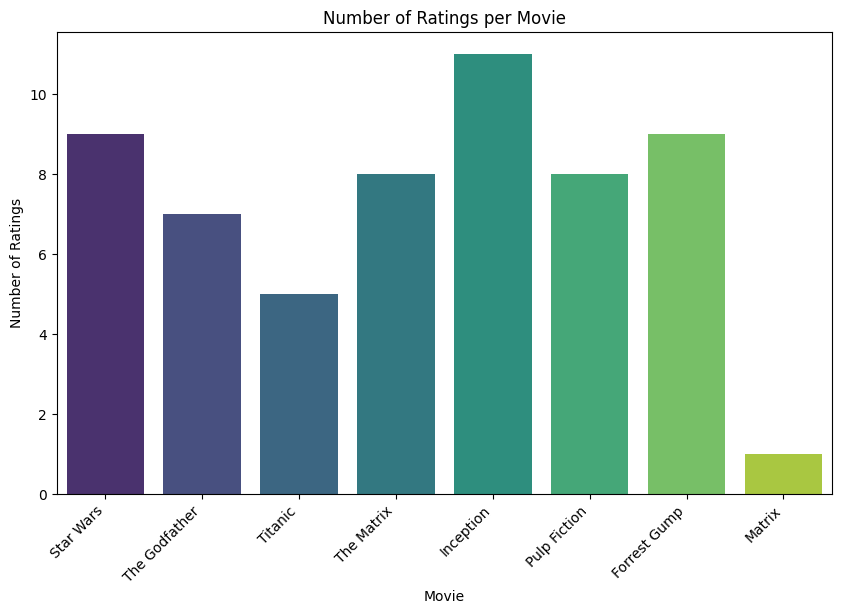

In [8]:
# Bar Chart of Number of Ratings per Movie
plt.figure(figsize=(10, 6))
sns.countplot(x='Movie', data=df, palette='viridis')
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

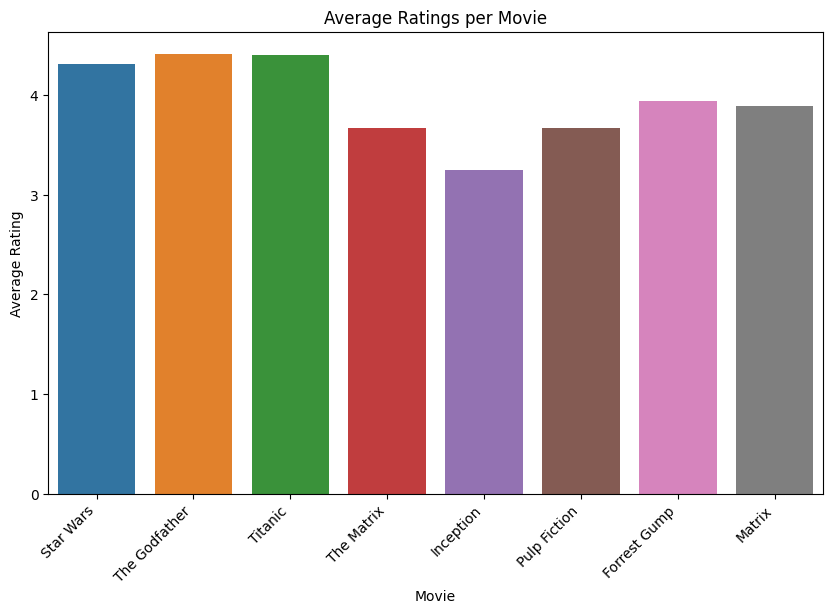

In [9]:
# Bar Chart of Average Ratings per Movie
plt.figure(figsize=(10, 6))
sns.barplot(x='Movie', y='Rating', data=df, errorbar=None)
plt.title('Average Ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

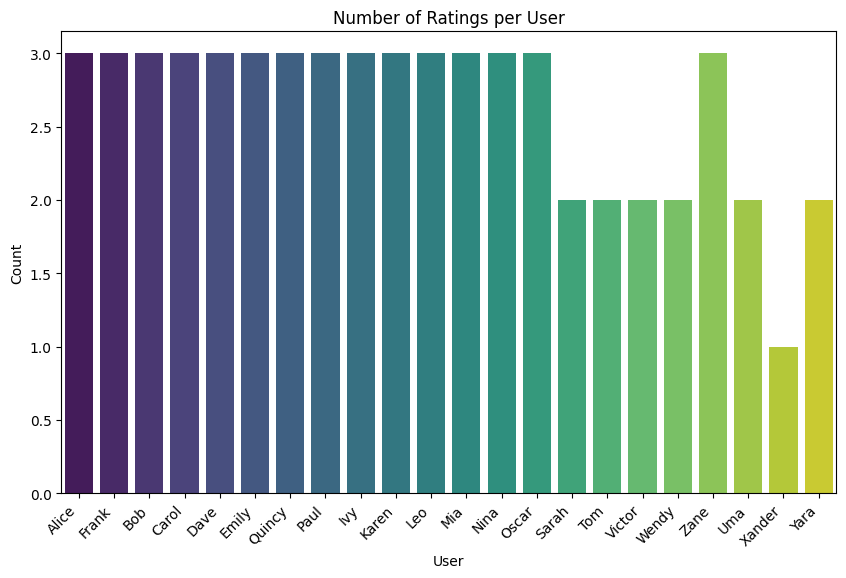

In [10]:
# Bar Chart of Ratings per User
plt.figure(figsize=(10, 6))
sns.countplot(x='User', data=df, palette='viridis')
plt.title('Number of Ratings per User')
plt.xlabel('User')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [11]:
# Create a matrix
pivot_ratings = df.pivot_table(index='User', columns='Movie', values='Rating', fill_value=None)


In [12]:
# Note, the NaN values means the user did not rate the given movie.
# For this task, I will replace it with 0

rating_matrix  = pivot_ratings.apply(lambda col: col.fillna(0), axis=0)


In [13]:
rating_matrix

Movie,Forrest Gump,Inception,Matrix,Pulp Fiction,Star Wars,The Godfather,The Matrix,Titanic
User,,,,,,,,
Alice,0.0,3.00,0.00,0.00,5.00,0.00,4.00,0.0
Bob,0.0,0.00,0.00,0.00,2.00,4.00,0.00,5.0
Carol,0.0,5.00,0.00,4.00,0.00,0.00,3.00,0.0
Dave,5.0,2.00,0.00,0.00,0.00,0.00,0.00,4.0
Emily,3.0,0.00,0.00,4.00,0.00,5.00,0.00,0.0
Frank,3.0,0.00,0.00,0.00,5.00,4.00,0.00,0.0
Ivy,0.0,3.00,0.00,0.00,5.00,0.00,4.00,0.0
Karen,0.0,5.00,0.00,4.00,0.00,0.00,3.00,0.0
Leo,5.0,2.00,0.00,0.00,0.00,0.00,0.00,4.0


In [14]:
# Standardizing & Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import typing as tp

# Standardize the rating_matrix
scaler = StandardScaler()
standardized_matrix = scaler.fit_transform(rating_matrix.T).T

# Dataframe
ratings_df = pd.DataFrame(standardized_matrix, index=rating_matrix.index, columns=rating_matrix.columns)

# cosine similarity between users
user_similarity = cosine_similarity(ratings_df)

user_similarity_df = pd.DataFrame(user_similarity, index=rating_matrix.index, columns=rating_matrix.index)

In [15]:
# User to User collaborative filtering

from typing import List, Union

def movie_recommendations(
    user_name: str,
    rating_matrix: pd.DataFrame,
    user_similarity_df: pd.DataFrame,
    threshold: float = 0.5,
    num_recommendations: int = 3
) -> tp.List[tp.Union[str, int]]:
    """
    Generate movie recommendations for a user based on collaborative filtering.

    Parameters:
        user_name (str): The name of the user.
        rating_matrix (pd.DataFrame): The user-item rating matrix.
        user_similarity_df (pd.DataFrame): The matrix of user similarity scores.
        threshold (float, optional): The rating threshold above which a movie is considered watched. Defaults to 0.5.
        num_recommendations (int, optional): The number of movie recommendations to generate. Defaults to 3.

    Returns:
        tp.List[tp.Union[str, int]]: A list of recommended movies for the user.
    """
    try:
        user_id = rating_matrix.index.get_loc(user_name)
    except KeyError:
        # Recommend popular movies
        popular_movies = rating_matrix.mean().sort_values(ascending=False).index
        return popular_movies[:num_recommendations]

    weighted_sum = user_similarity_df.iloc[user_id].dot(rating_matrix.fillna(0))

    # Exclude movies the user has rated above the threshold, meaning they have watched the program.
    rated_movies_above_threshold = rating_matrix.loc[user_name][rating_matrix.loc[user_name] >= threshold].index
    unrated_movies = [movie for movie in rating_matrix.columns if movie not in rated_movies_above_threshold]

    # Calculate the predicted ratings
    predicted_ratings = weighted_sum / user_similarity_df.iloc[user_id].sum()

    # Unrated, meaning the user has not watched them yet
    recommendations = predicted_ratings[unrated_movies].sort_values(ascending=False).index[:num_recommendations].tolist()

    # Fallback
    if not recommendations:
        popular_movies = rating_matrix.mean().sort_values(ascending=False).index
        recommendations = popular_movies[:num_recommendations]

    return recommendations



In [16]:
# Validate username
def is_valid_name(name):
    return name.isalpha()

# Interactive user input with validation
while True:
    user_name = input("Enter your user's name: ")
    if is_valid_name(user_name):
        user_name = user_name.capitalize()
        break
    else:
        print("Invalid name. Please enter a name containing only alphabetical letters, with the first letter capitalized.")

# Get Recommendations
user_recommendations = movie_recommendations(user_name, rating_matrix, user_similarity_df)

print(f"\nTop Movie recommendations for you, {user_name}")
for i, movie in enumerate(user_recommendations, 1):
    print(f"{i}. {movie}")


Enter your user's name: alice

Top Movie recommendations for you, Alice
1. Pulp Fiction
2. Matrix
3. Titanic
